In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as plt
import stock_utils as su
import pylab as pl
import os.path

%matplotlib inline

In [2]:
# We will look at stock prices over the past year, starting at January 1, 2010
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2017, 11, 30)
end_date = datetime.date.today()

tickers = ['AAPL', 'XOM', 'JNJ']

In [3]:
if not os.path.exists('data'):
    su.get_quandl_data(tickers, start_date, end_date)

Creating folder data
https://www.quandl.com/api/v3/datasets/WIKI/AAPL/data.csv?start_date=2010-01-01&end_date=2017-12-09&api_key=ez-ADzG6c-RPCxB2uzLs
Saving to data/AAPL.csv
https://www.quandl.com/api/v3/datasets/WIKI/XOM/data.csv?start_date=2010-01-01&end_date=2017-12-09&api_key=ez-ADzG6c-RPCxB2uzLs
Saving to data/XOM.csv
https://www.quandl.com/api/v3/datasets/WIKI/JNJ/data.csv?start_date=2010-01-01&end_date=2017-12-09&api_key=ez-ADzG6c-RPCxB2uzLs
Saving to data/JNJ.csv


In [4]:
data_frame = pd.read_csv(su.symbol_to_path(tickers[0]), index_col = 'Date', parse_dates = True, na_values = ['NaN'])
data_frame.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-08,170.49,171.0000,168.82,169.370,23096872.0,0.0,1.0,170.49,171.0000,168.82,169.370,23096872.0
2017-12-07,169.03,170.4400,168.91,169.452,24469613.0,0.0,1.0,169.03,170.4400,168.91,169.452,24469613.0
2017-12-06,167.50,170.2047,166.46,169.010,28224357.0,0.0,1.0,167.50,170.2047,166.46,169.010,28224357.0
2017-12-05,169.06,171.5200,168.40,169.640,27008428.0,0.0,1.0,169.06,171.5200,168.40,169.640,27008428.0
2017-12-04,172.48,172.6200,169.63,169.800,32115052.0,0.0,1.0,172.48,172.6200,169.63,169.800,32115052.0


In [5]:
data_frame.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000,1.997000e+03
mean,293.767042,296.380740,290.783274,293.645752,2.803017e+07,0.015258,1.003005,83.120649,83.820901,82.357831,83.110697,8.628971e+07
std,181.971692,183.584365,180.025180,181.810546,1.925104e+07,0.190551,0.134265,36.081564,36.299209,35.856239,36.091625,6.070732e+07
min,90.000000,90.700000,89.470000,90.280000,5.624800e+06,0.000000,1.000000,24.722226,25.188732,24.449777,24.681102,1.147592e+07
25%,117.700000,118.810000,116.780000,117.810000,1.447390e+07,0.000000,1.000000,52.291036,52.604610,51.648466,52.147100,3.986984e+07
50%,254.700000,257.970000,249.750000,253.510000,2.242830e+07,0.000000,1.000000,77.759928,78.429486,77.108363,77.874306,7.107467e+07
75%,449.820000,454.430000,443.140000,448.970000,3.587430e+07,0.000000,1.000000,108.641339,109.953484,107.683320,108.986303,1.140055e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,175.110000,176.095000,174.645900,175.880000,4.702495e+08


## Ticker price for a single stock for the period

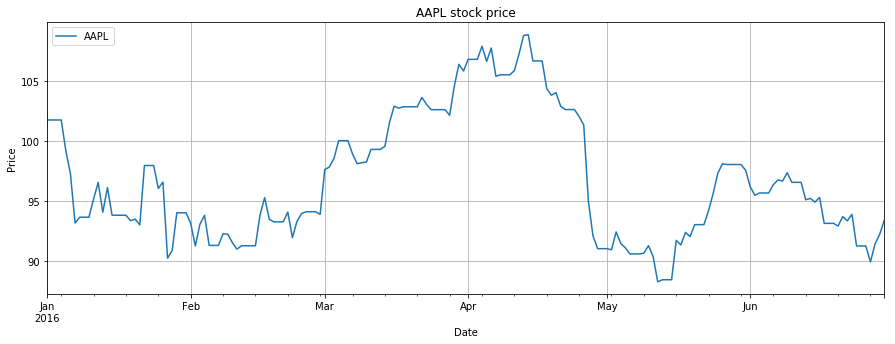

In [6]:
start_date = '2016-01-01'
end_date = '2016-06-30'

data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(figsize=(15,5), grid=True, title='{0} stock price'.format(tickers[0]))

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Rolling mean and Bollinger bands

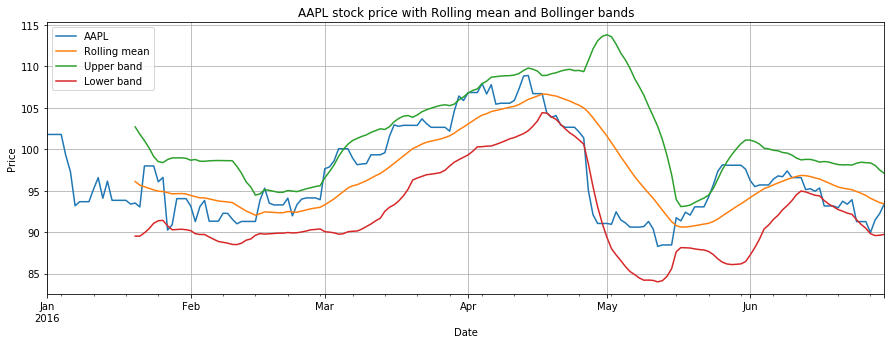

In [7]:
data_frame = su.get_data_frame(tickers[0], start_date, end_date, dropna=True)
ax = data_frame.plot(label=tickers[0])

#Calculate rolling mean and rolling std for a period of 20 days
window_size = 20

rolling_mean = su.get_rolling_mean(data_frame, window=window_size)
rolling_std = su.get_rolling_std(data_frame, window=window_size)

#Calculate Bollinger bands
upper_band, lower_band = su.get_bollinger_bands(rolling_mean, rolling_std)

# rename the columns so they are labeled properly on the plot
upper_band = upper_band.rename(columns = {upper_band.columns[0] : 'Upper band'})
lower_band = lower_band.rename(columns = {lower_band.columns[0] : 'Lower band'})
rolling_mean = rolling_mean.rename(columns = {rolling_mean.columns[0] : 'Rolling mean'})

rolling_mean.plot(ax=ax, label='Rolling mean')
upper_band.plot(label='Upper band', ax=ax)
lower_band.plot(label='Lower band', ax=ax, figsize=(15, 5), grid=True)

ax.set_title('{0} stock price with Rolling mean and Bollinger bands'.format(tickers[0]))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Plotting prices for selected stocks

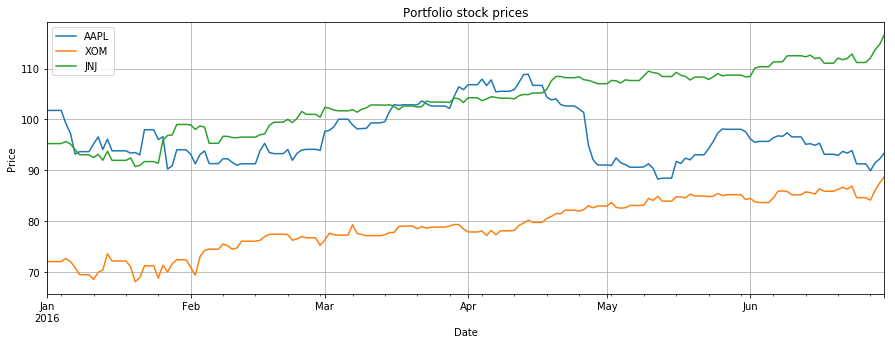

In [8]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

ax = data_frame.plot(figsize=(15,5), grid=True, title='Portfolio stock prices')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Normalized prices for selected stocks

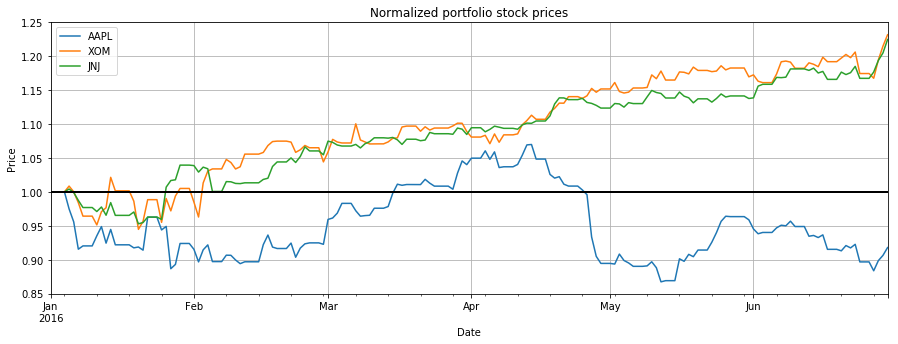

In [9]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

data_frame = su.normalize_data(data_frame)
ax = data_frame.plot(figsize=(15,5), grid=True, title='Normalized portfolio stock prices')

ax.axhline(y=1, color='black', lw=2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Daily returns for selected stocks

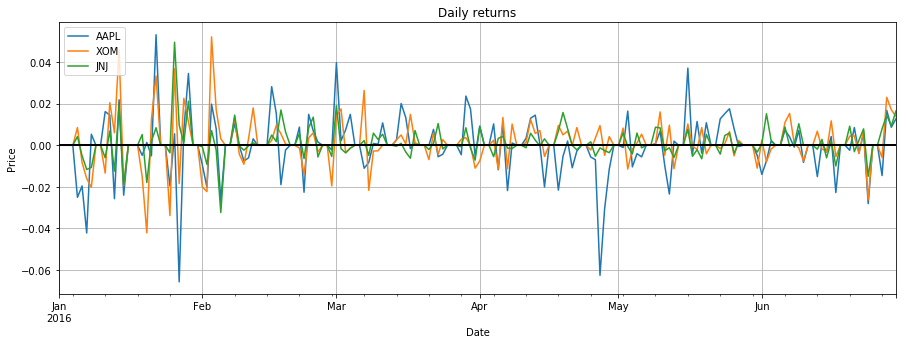

In [10]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)

daily_returns = su.compute_daily_returns(data_frame)
ax = daily_returns.plot(figsize=(15,5), grid = True)

ax.axhline(y = 0, color = 'black', lw = 2)
ax.set_title('Daily returns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc='upper left')

## Cummulative returns (in percentage) at the end of the period for selected stocks

In [11]:
data_frame = su.get_data_frame_for_symbols(tickers, start_date, end_date, include_spy=True)
cummulative_returns = su.compute_cummulative_returns(data_frame, data_frame.shape[0] - 1)
print(cummulative_returns.ix[-1, :])

AAPL   -0.082086
XOM     0.231518
JNJ     0.224533
Name: 2016-06-30 00:00:00, dtype: float64
